# Introduction to Regression with Neural Networks in TensorFlow

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


## Creating data to view and fit

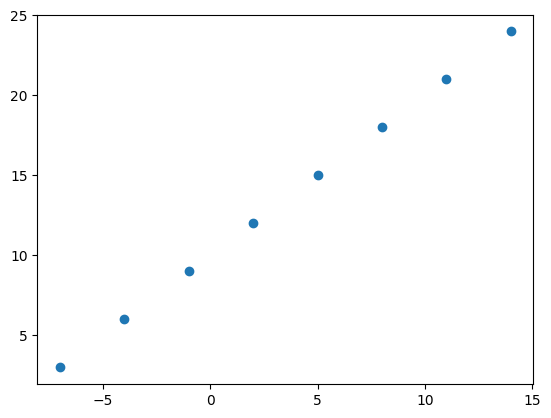

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it...............
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [7]:
# Turn our NumPy arrays into tensors with dtpye float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

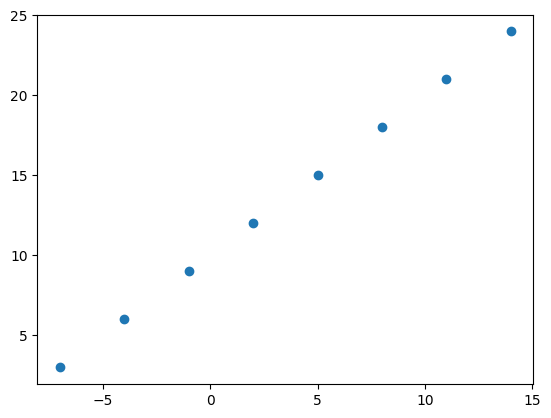

In [9]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow
1. Creating a model.
2. Compiling a model.
3. Fitting a model.
4. Evaluate the model.

In [10]:
X = tf.expand_dims(X, axis=-1)

In [11]:
# Reshape X to have an additional dimension for the batch size

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.0739 - mae: 9.0739   
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - loss: 8.9414 - mae: 8.9414
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 8.8089 - mae: 8.8089
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8.6764 - mae: 8.6764
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 8.5439 - mae: 8.5439


In [12]:
# checkout X and y
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try and make a prediction using oir model
new_input = tf.constant([[17.0]])
y_pred = model.predict(new_input)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


array([[24.522968]], dtype=float32)

## Improving our model



We can improve our model, b altering the steps we took to create a model
1. **Creating a model** - here we might add more layers, increase the number of hidden layers units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model**- here we might change the optimisation function, or perhaps the **learning rate** of the optimisation function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it train in for longer) or more data (give the model more examples to learn from).

In [14]:
# Reshape X to have an additional dimension for the batch size
# = tf.expand_dims(X, axis=-1)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step - loss: 8.0592 - mae: 8.0592
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 7.9267 - mae: 7.9267
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 7.7942 - mae: 7.7942
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.6617 - mae: 7.6617
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - loss: 7.5292 - mae: 7.5292
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - loss: 7.4625 - mae: 7.4625
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 7.4569 - mae: 7.4569
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 7.4513 - mae: 7.4513
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 7.4456 - mae: 7.4456
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 7.4400 - mae: 7.4400
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 7.4344 - mae: 7.4344
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 7.4288 - mae: 7.4288
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [15]:
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[30.164186]], dtype=float32)

In [17]:
import tensorflow as tf

# Let's make another improvementimprovement

# 1. Create the model (add extr hidden layer with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14.2281 - mae: 14.2281
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 13.5038 - mae: 13.5038
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.7905 - mae: 12.7905
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.0919 - mae: 12.0919
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.6507 - mae: 11.6507
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 11.2209 - mae: 11.2209
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.7839 - mae: 10.7839
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.3345 - mae: 10.3345
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.8698 - mae: 9.8698
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.3887 - mae: 9.3887
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 8.8877 - mae: 8.8877
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 8.3668 - mae: 8.3668
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━

In [18]:
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


array([[27.702026]], dtype=float32)

**Note:**

The `learning_rate` is the most important hyperparameter of many different neural networks.

## Evaluating a model

In practice, a typing workflow you'll go through when building neural networks is:

```
Building a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:
> "visualize, visualize, visualize"

It's a good idea to visualize:
* The data
* The model itself
* The training of a model - how does a model perform while it learns?
* The predictions of the model

In [19]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [20]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

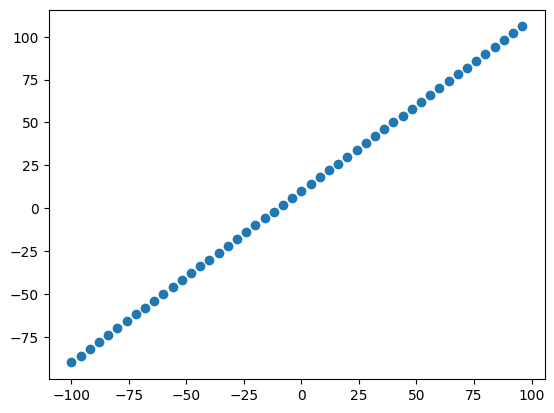

In [21]:
# visualize it

import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...

* Training set (70-80% of data)
* Validation set (10-15% of data)
* Test set (10-15% of data)

In [22]:
len(X)

50

In [23]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80%)
y_train = y[:40] # last 10

X_test = X[40:]
y_test = y[40:]

### Visualize the data

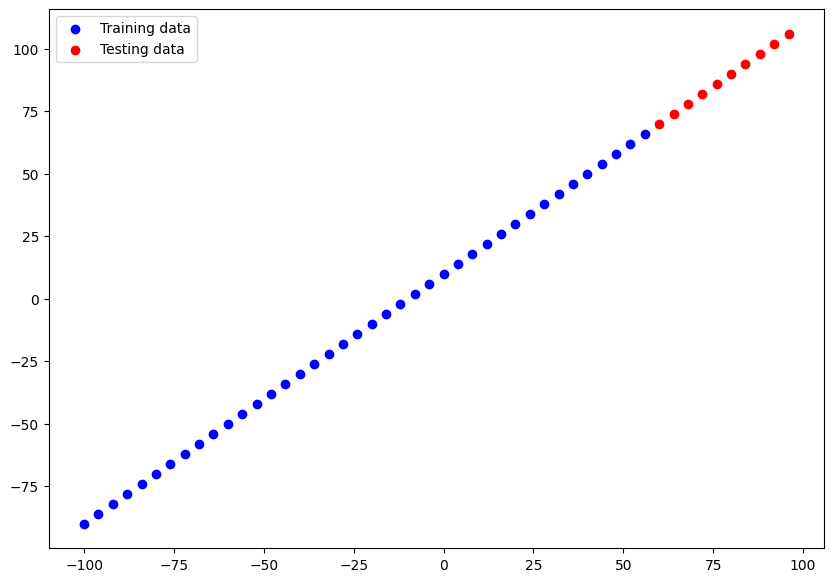

In [24]:
plt.figure(figsize=(10, 7))

# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# plot test data in red
plt.scatter(X_test, y_test, c="r", label="Testing data")

# Show legend
plt.legend();

In [25]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

### Visualizing the model

In [26]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:

# Let's create a model which builds automatically by defining the input_input_shape
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# compile the model
model.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.SGD(),
                    metrics=["mae"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
# let's fit

model.fit(X_train, y_train, epochs=100, verbose=0)

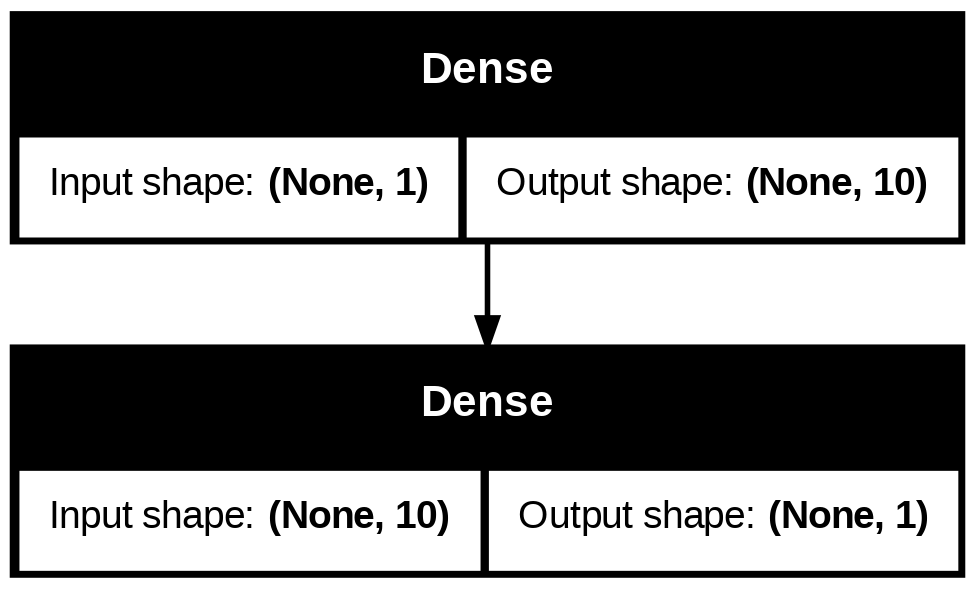

In [30]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

In [31]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


array([[41.636894],
       [44.303932],
       [46.970963],
       [49.637993],
       [52.30503 ],
       [54.972057],
       [57.639088],
       [60.306126],
       [62.973152],
       [65.64019 ]], dtype=float32)

In [32]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [33]:
#Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions = y_pred):
  """
  plots training dsta, test data and compares predicrions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_label, c="g", label="Test data")
  # Plot model's predictions in reð
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # show legend
  plt.legend()


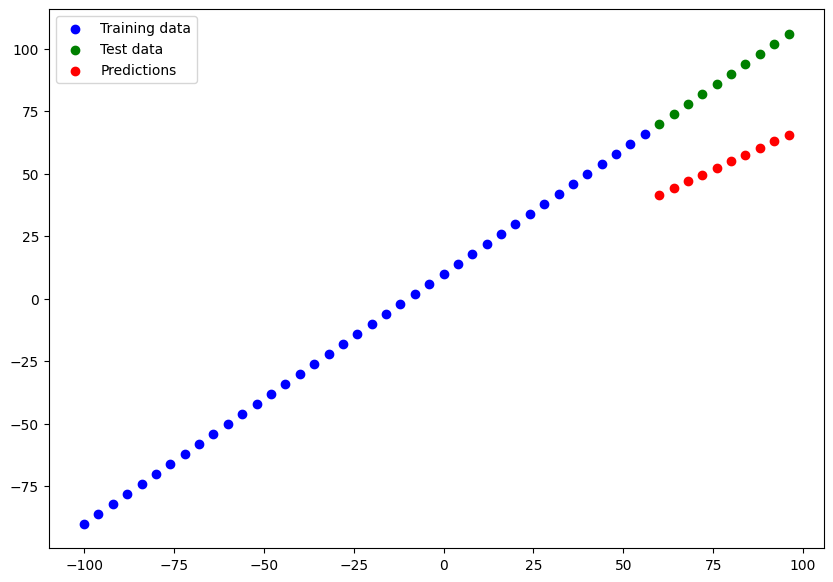

In [34]:
plot_predictions()

### Evaluating our model's predictions

In [35]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - loss: 34.3615 - mae: 34.3615


[34.36145782470703, 34.36145782470703]

In [36]:
# Calculate the mean absolute error
mae = tf.metrics.MAE(y_true=y_test, y_pred=tf.constant(y_pred)) # Changed the location of the MAE function to the "tf.metrics" module
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([28.363106, 29.696068, 31.029037, 32.362007, 33.69497 , 35.027943,
       36.360912, 37.693874, 39.026848, 40.35981 ], dtype=float32)>

In [37]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[41.636894],
       [44.303932],
       [46.970963],
       [49.637993],
       [52.30503 ],
       [54.972057],
       [57.639088],
       [60.306126],
       [62.973152],
       [65.64019 ]], dtype=float32)>

In [38]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [39]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([41.636894, 44.303932, 46.970963, 49.637993, 52.30503 , 54.972057,
       57.639088, 60.306126, 62.973152, 65.64019 ], dtype=float32)>

In [40]:
mae = tf.metrics.MAE(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=34.36145782470703>

In [41]:
# Calculate the mean square error
mse = tf.metrics.MSE(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1195.368408203125>

In [48]:
# Make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.MAE(y_true=y_test, y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.metrics.MSE(y_true=y_test, y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model
1. Get more data
2. Make your mdel larger
3. Train for longer

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

In [43]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

**Build `model_1`**

In [44]:
# Set random seed
tf.random.set_seed(42)

# Fix input shape
X_train = np.expand_dims(X_train, axis=-1)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 91.5343 - mae: 91.5343
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 56.3660 - mae: 56.3660
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 22.0420 - mae: 22.0420
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.2310 - mae: 10.2310
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.9773 - mae: 11.9773
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.8720 - mae: 8.8720
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 10.3426 - mae: 10.3426
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.8833 - mae: 9.8833
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.5484 - mae: 11.5484
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.5243 - mae: 8.5243
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.9930 - mae: 9.9930  
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.6939 - mae: 11.6939
Epoch 13/100
2/2 ━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


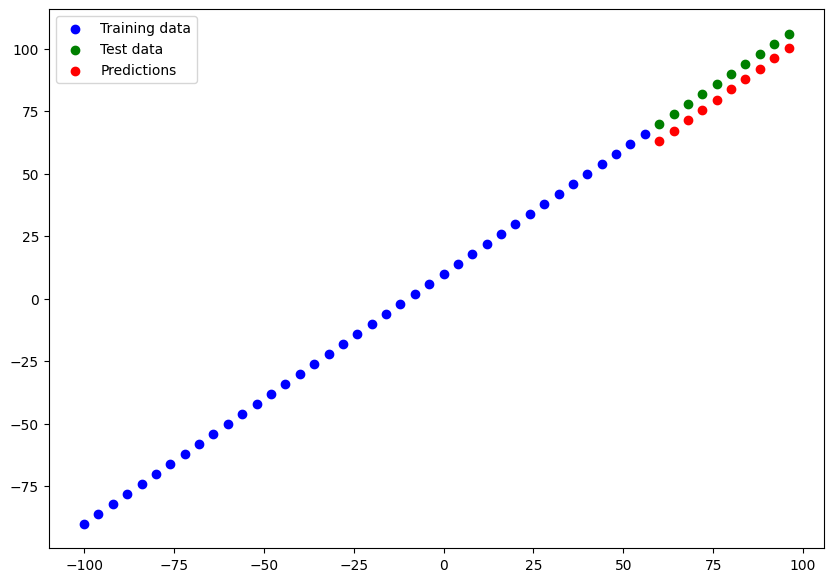

In [45]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [47]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 63.161663],
        [ 67.28061 ],
        [ 71.39955 ],
        [ 75.51849 ],
        [ 79.63744 ],
        [ 83.756386],
        [ 87.87533 ],
        [ 91.99428 ],
        [ 96.11322 ],
        [100.23216 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 63.161663,  67.28061 ,  71.39955 ,  75.51849 ,  79.63744 ,
         83.756386,  87.87533 ,  91.99428 ,  96.11322 , 100.23216 ],
       dtype=float32)>)

In [49]:
# Calaculate model_1 evaluation metrics
mae_1 = mae(y_test, (y_preds_1))
mse_1 = mse(y_test, (y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=6.303086280822754>,
 <tf.Tensor: shape=(), dtype=float32, numpy=39.845619201660156>)

**Build `model_2`**
* 2 densed layers, trained for 100 epochs

In [55]:
# Set random see
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - loss: 50.4095 - mse: 3697.3738
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 25.2485 - mse: 872.0192
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 23.9320 - mse: 778.3170 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 14.4655 - mse: 335.7025
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 18.5288 - mse: 461.7270
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12.3383 - mse: 237.3909
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 15.1337 - mse: 319.6461
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 15.7545 - mse: 337.0197
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.6747 - mse: 214.8700
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 14.6207 - mse: 298.2105
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 15.6200 - mse: 329.4083
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.8286 - mse: 213.6573
Epoch 13/1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


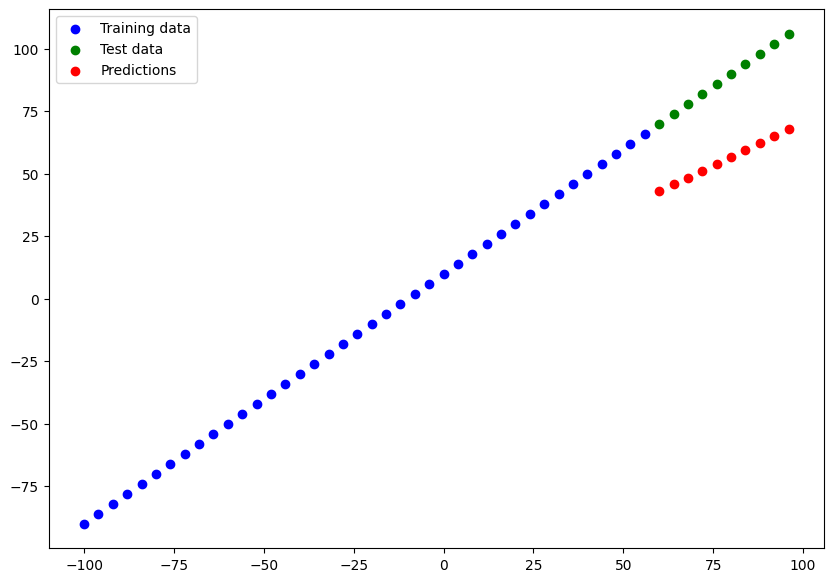

In [56]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [57]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=32.62498092651367>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1077.1904296875>)

**Build `model_3`**
* 2 layers, trained for 500 epochs

In [58]:
# Set random see
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - loss: 35.2973 - mae: 35.2973
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 27.5515 - mae: 27.5515 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 24.7625 - mae: 24.7625
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 20.2879 - mae: 20.2879
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 12.6503 - mae: 12.6503
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 18.9747 - mae: 18.9747
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13.7673 - mae: 13.7673
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 15.0372 - mae: 15.0372
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 15.8627 - mae: 15.8627
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.9254 - mae: 11.9254
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 14.9160 - mae: 14.9160
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.9992 - mae: 10.9992
Epoch 13/500
2/2 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


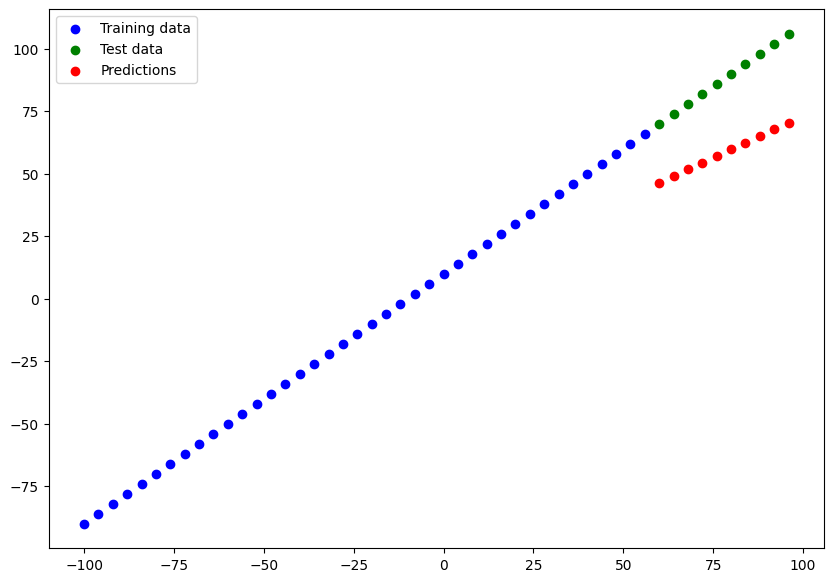

In [59]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [60]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=29.5081844329834>,
 <tf.Tensor: shape=(), dtype=float32, numpy=885.41796875>)

## Comparing the results of our experiments

In [62]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,6.303086,39.845619
1,model_2,32.624981,1077.190430
2,model_3,29.508184,885.417969


In [63]:
model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)